## 0. Feature Engineering and Feature Selection
We'll start Day 3 by building and selecting useful features to improve model performance.

### ✨ Feature Engineering Techniques
Try the following methods:
- Polynomial features
- Interaction features
- Binning
- Log transforms
- Scaling/standardization

In [26]:
import pandas as pd
diabetes = pd.read_csv('diabetes_regression.csv')

In [27]:
diabetes['bmi_squared'] = diabetes['bmi'] ** 2
diabetes['bp_age'] = diabetes['bp'] * diabetes['age']

In [28]:
import numpy as np
import pandas as pd
diabetes['age_bin'] = pd.cut(diabetes['age'], bins=5, labels=False)
diabetes['log_s1'] = np.log1p(diabetes['s1'])

### 🔍 Feature Selection Techniques
Apply at least three techniques below:
- Feature importance from tree-based models
- Recursive Feature Elimination (RFE)
- SelectKBest with f_regression

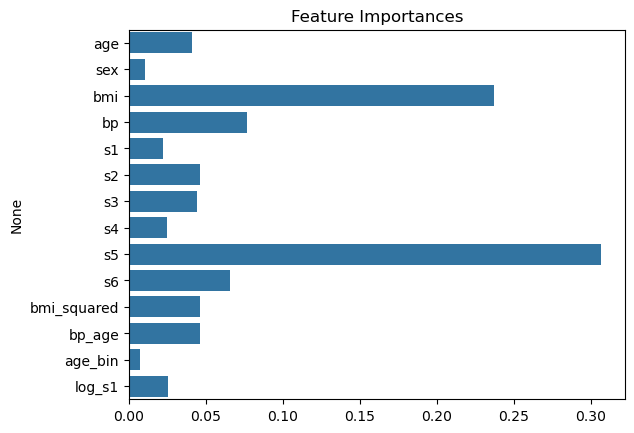

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt

X = diabetes.drop('target', axis=1)
y = diabetes['target']
model = DecisionTreeRegressor(random_state=42)
model.fit(X, y)

feat_imp = pd.Series(model.feature_importances_, index=X.columns)
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Feature Importances')
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
selector = RFE(estimator=LinearRegression(), n_features_to_select=5)
selector.fit(X, y)
print('Top features by RFE:', X.columns[selector.support_])

Top features by RFE: Index(['bmi', 's5', 'bmi_squared', 'bp_age', 'log_s1'], dtype='object')


In [31]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X, y)
print('Top features by f_regression:', X.columns[selector.get_support()])

Top features by f_regression: Index(['bmi', 'bp', 's3', 's4', 's5'], dtype='object')


## 🧪 Model Validation and Overfitting Awareness

To avoid overfitting, we need to split our data into **training and testing sets**.
We'll also use **cross-validation** and **feature selection** to compare models:

- Full feature set vs. selected features
- Cross-validated scores vs. train-only accuracy
- Hyperparameter tuning with GridSearchCV

In [32]:
from sklearn.model_selection import train_test_split
X = diabetes.drop('target', axis=1)
y = diabetes['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
print('Train R²:', model.score(X_train, y_train))
print('Test R²:', model.score(X_test, y_test))

Train R²: 1.0
Test R²: -0.0377140091682302


In [34]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print('CV R² scores:', cv_scores)
print('Average CV R²:', cv_scores.mean())

CV R² scores: [-0.31585205 -0.07176501 -0.05441536 -0.55634658 -0.29504893]
Average CV R²: -0.2586855844423853


In [35]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=6)
X_reduced = selector.fit_transform(X, y)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

model.fit(X_train_r, y_train_r)
print('Reduced feature model R² (test):', model.score(X_test_r, y_test_r))

Reduced feature model R² (test): 0.2229556509858064


In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [2, 4, 6, 8, None], 'min_samples_split': [2, 5, 10]}
gs = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2')
gs.fit(X, y)
print('Best Parameters:', gs.best_params_)
print('Best CV R²:', gs.best_score_)

Best Parameters: {'max_depth': 2, 'min_samples_split': 2}
Best CV R²: 0.3268172933460095


## 1. Linear Regression with Diabetes Dataset

In this section, we'll explore simple linear regression using the diabetes dataset. Start by loading the dataset and training a linear model.

In [37]:
import pandas as pd
diabetes = pd.read_csv('diabetes_regression.csv')
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
from sklearn.linear_model import LinearRegression

X = diabetes.drop('target', axis=1)
y = diabetes['target']

model = LinearRegression()
model.fit(X, y)
print('Coefficients:', model.coef_)

Coefficients: [ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]


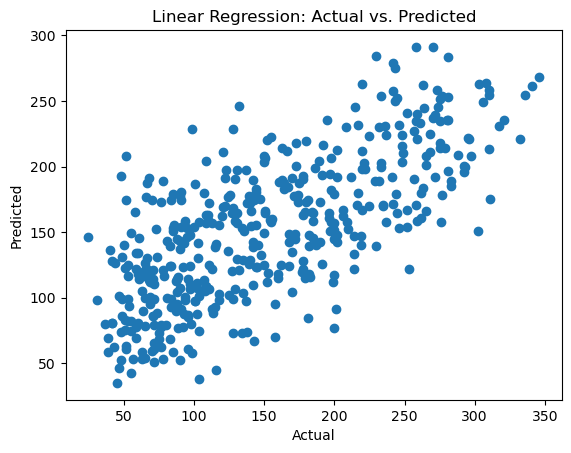

In [39]:
import matplotlib.pyplot as plt
preds = model.predict(X)
plt.scatter(y, preds)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()

## 2. Decision Tree Regression

Train and evaluate a Decision Tree Regressor. Compare its performance to linear regression.

In [40]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train_r, y_train_r)
tree_preds = tree.predict(X_test_r)

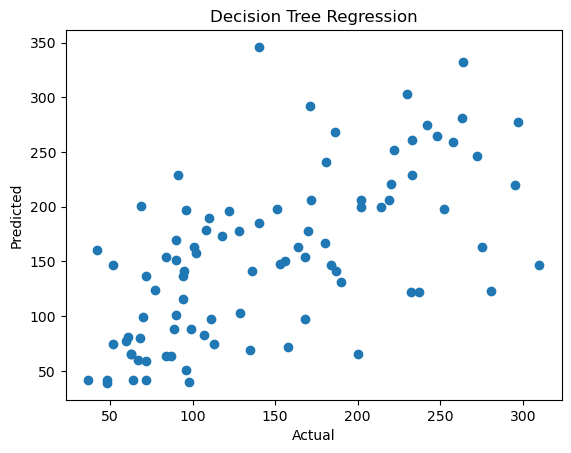

In [41]:
plt.scatter(y_test_r, tree_preds)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression')
plt.show()

## 3. Ensemble Methods: Random Forest and Gradient Boosting

Now we'll apply ensemble models like Random Forest and Gradient Boosting to the same data.

In [42]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_r, y_train_r)
rf_preds = rf.predict(X_test_r)

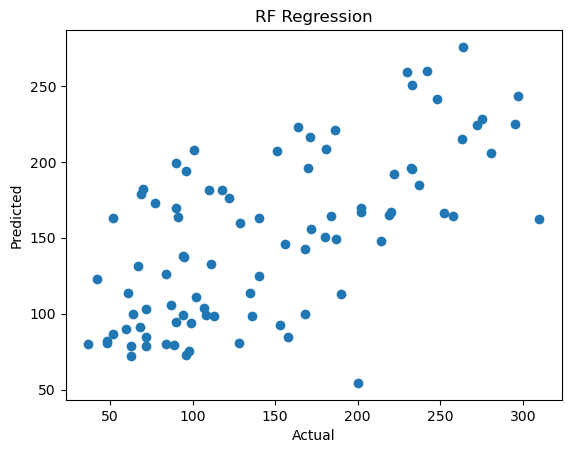

In [43]:
plt.scatter(y_test_r, rf_preds)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RF Regression')
plt.show()

In [53]:
print('Reduced feature model R² (test):', rf.score(X_test_r, y_test_r))

Reduced feature model R² (test): 0.418864800984877


In [44]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_r, y_train_r)
gb_preds = gb.predict(X_test_r)

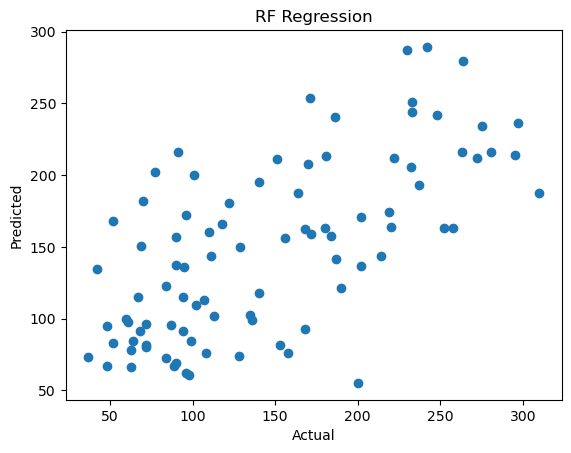

In [45]:
plt.scatter(y_test_r, gb_preds)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RF Regression')
plt.show()

In [54]:
print('Reduced feature model R² (test):', gb.score(X_test_r, y_test_r))

Reduced feature model R² (test): 0.41697445581393533


## 4. Evaluation Metrics

Compare models using MSE, MAE, and R². Use the predictions from previous sections.

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Linear MSE:', mean_squared_error(y, preds))
print('Tree MSE:', mean_squared_error(y, tree_preds))
print('RF MSE:', mean_squared_error(y, rf_preds))
print('GB MSE:', mean_squared_error(y, gb_preds))

Linear MSE: 2859.6963475867506
Tree MSE: 0.0
RF MSE: 476.8155608597285
GB MSE: 1191.6744015438958


## 5. Ensemble Classification (Wine Dataset)

Use Random Forest and Gradient Boosting Classifiers on the wine dataset. Evaluate with accuracy and confusion matrix.

In [46]:
wine = pd.read_csv('wine_classification.csv')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Xw = wine.drop('target', axis=1)
yw = wine['target']
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size=0.3, random_state=42)

In [47]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(Xw_train, yw_train)
preds_rfc = rfc.predict(Xw_test)
print('Random Forest Accuracy:', accuracy_score(yw_test, preds_rfc))

Random Forest Accuracy: 1.0


In [48]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(Xw_train, yw_train)
preds_gbc = gbc.predict(Xw_test)
print('Gradient Boosting Accuracy:', accuracy_score(yw_test, preds_gbc))

Gradient Boosting Accuracy: 0.9074074074074074


### 🧪 Exercise: Feature Engineering
Create additional features from existing ones (e.g., polynomial terms or interactions) to enhance model performance.

In [49]:
diabetes['bmi_squared'] = diabetes['bmi'] ** 2
diabetes['bp_age_interaction'] = diabetes['bp'] * diabetes['age']


In [50]:
X_enhanced = diabetes.drop('target', axis=1)
y = diabetes['target']
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_enhanced, y)
print('Enhanced model R²:', model.score(X_enhanced, y))

Enhanced model R²: 0.528434236902266


### 📊 Exercise: Feature Importance & Recursive Feature Elimination (RFE)
Use feature importance or RFE to select the most relevant predictors.

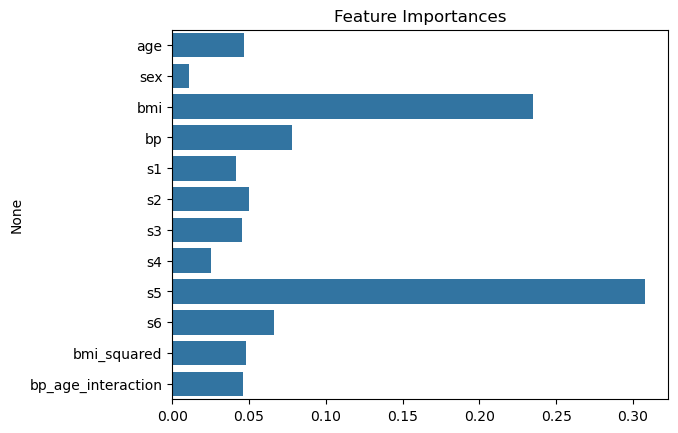

In [51]:
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

model = RandomForestRegressor(random_state=42)
model.fit(X_enhanced, y)

feat_imp = pd.Series(model.feature_importances_, index=X_enhanced.columns)
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Feature Importances')
plt.show()

In [52]:
from sklearn.feature_selection import RFE
selector = RFE(estimator=LinearRegression(), n_features_to_select=5)
selector.fit(X_enhanced, y)
print('Selected Features:', X_enhanced.columns[selector.support_])

Selected Features: Index(['bmi', 's1', 's5', 'bmi_squared', 'bp_age_interaction'], dtype='object')
